In [54]:
import iris 
import matplotlib.pyplot as plt
import iris.coord_categorisation
import numpy as np
import cartopy as cart
import os
import pandas as pd
import cartopy as cart
import glob

In [55]:
#--------------------------------------------------------------------------
# LOAD DATAFRAMES
#--------------------------------------------------------------------------

os.chdir('C:\\Users\\fb428\\OneDrive - University of Exeter\\Documents\\PhD\\papers\\manuscript3\\figures_and_data\\figure_making\\output_files\\')

site_info = pd.read_csv('station_info.csv')

site = pd.read_csv('site_daily.csv')
UKESM = pd.read_csv('UKESM_daily.csv')


In [56]:
#--------------------------------------------------------------------------
# MERGE ALL SITES AND ADD NAMES
#--------------------------------------------------------------------------

locs = site_info[['item', 'name']].drop_duplicates()
chose_names = ['Amazonas', 'Porto Velho', 'Santarem', 'Congo', 'Bukit Koto', 'Watukosek',  'Daintree', 'Panama' ]

site_names = pd.merge(site, locs, on=['item'])
UKESM_names = pd.merge(UKESM, locs, on=['item'])

site_choice = site_names[site_names['name'].isin(chose_names)]
UKESM_choice = UKESM_names[UKESM_names['name'].isin(chose_names)]

n = len(chose_names)

In [58]:
#--------------------------------------------------------------------------
# DROP CRAZY OUTLIERS
#--------------------------------------------------------------------------

site_choice.drop(site_choice[(site_choice['Ozone_avg'] <= 3) & (site_choice['scaled_day'] <= -8)].index, inplace=True)

site_choice.dropna(subset='scaled_day', inplace=True)

C:\Users\fb428\AppData\Local\Temp\ipykernel_9600\2217525891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_choice.drop(site_choice[(site_choice['Ozone_avg'] <= 3) & (site_choice['scaled_day'] <= -8)].index, inplace=True)
C:\Users\fb428\AppData\Local\Temp\ipykernel_9600\2217525891.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_choice.dropna(subset='scaled_day', inplace=True)


In [59]:
#--------------------------------------------------------------------------
# SCALE BY NUMBER OF VALUES PER DAY / get a weighting
#--------------------------------------------------------------------------

total_days_site = site_choice.groupby(['name','Month'])['Ozone_avg'].count().reset_index()
total_days_site['weights'] = 1/total_days_site['Ozone_avg']

total_days_site.drop(['Ozone_avg'], axis=1, inplace=True)
site_scaled = pd.merge(site_choice, total_days_site, on=['name', 'Month'])

#--------------------------------------------------------------------------
# UKESM
#--------------------------------------------------------------------------

total_days = UKESM_choice.groupby(['name','month'])['daily_mean'].count().reset_index()
total_days['weights'] = 1/total_days['daily_mean']

total_days.drop(['daily_mean'], axis=1, inplace=True)

UKESM_scaled = pd.merge(UKESM_choice, total_days, on=['name', 'month'])

In [60]:
total_days_site = site_choice.groupby(['name','Month'])['Ozone_avg'].count().reset_index()
total_days_site['weights'] = 1/total_days_site['Ozone_avg']

total_days = UKESM_choice.groupby(['name','month'])['daily_mean'].count().reset_index()
total_days['weights'] = 1/total_days['daily_mean']

In [61]:
letter_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(j)', '(k)']

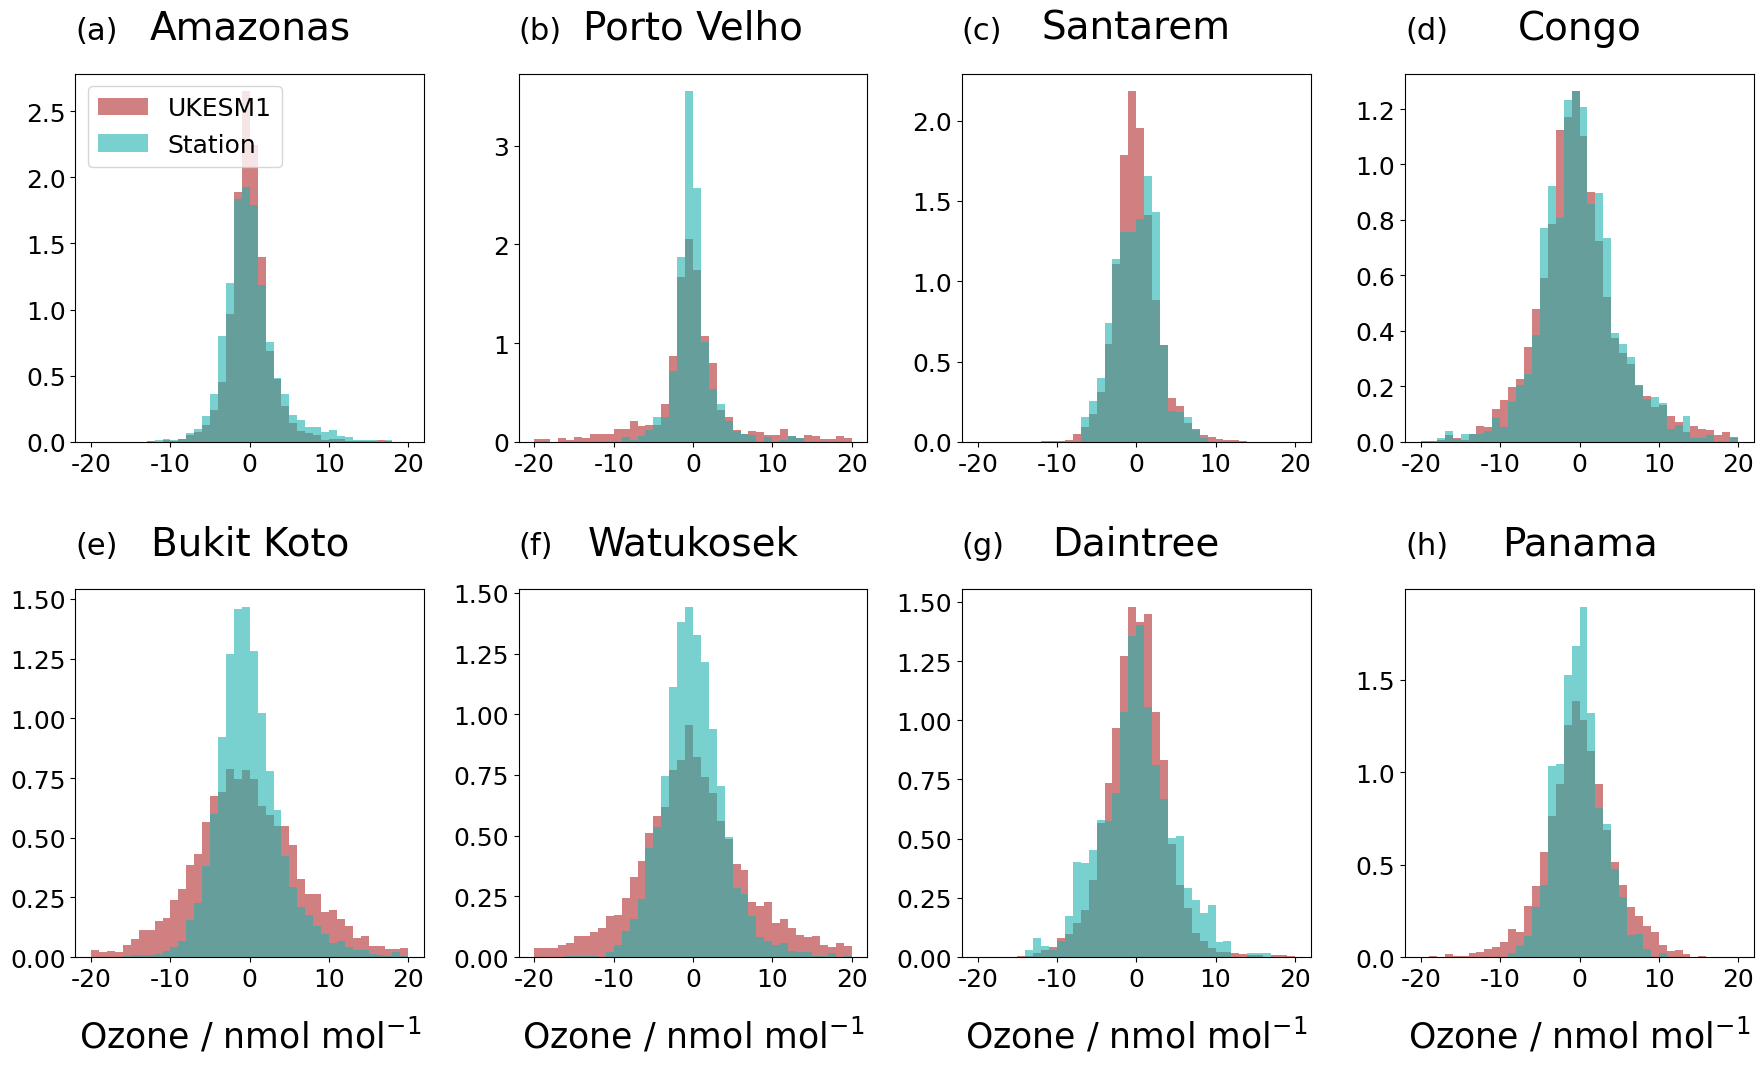

In [65]:
#----------------------------------------------------------------
# Daily distribution
#----------------------------------------------------------------

plt.figure(figsize=(18,11))
plt.rcParams['font.size']=18


for i in range(n):
    plt.subplot(2,4,i+1)
    
    site_data = site_scaled[site_scaled['name'] == chose_names[i]]
    UKESM_data = UKESM_scaled[UKESM_scaled['name'] == chose_names[i]]
    
#-------------------------------- plot--------------------------------------------
    
    # points + error bars
    plt.hist(UKESM_data['scaled_day'], weights = UKESM_data['weights'], bins=np.linspace(-20,20,41), alpha=0.6,
                color=[0.6980, 0.1725, 0.1725], label = 'UKESM1')
    
    plt.hist( site_data['scaled_day'], weights = site_data['weights'], stacked=True, bins=np.linspace(-20,20,41), alpha=0.6,
              color=[0.1157, 0.7022, 0.6843], label='Station')
    

    # axes
    plt.title(chose_names[i], size=28, pad=25)
    plt.title(letter_labels[i], loc='left', size=22, pad=25)
    plt.xticks(range(-20,21,10), range(-20,21,10))
    
for i in range(5,9):
    plt.subplot(2,4,i) 
    plt.xlabel('Ozone / nmol mol$^{-1}$', size = 25, labelpad = 18)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

plt.subplot(241)
plt.legend(loc='upper left')

plt.savefig('figures/daily.png', dpi=300)